# Carregando o arquivo da semana passada

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_json('Telco-Customer-Churn-limpeza.json')
data.head()

,customerID,Churn,Genero,MelhorIdade,Conjuge,Dependentes,MesesContrato,ServicoTelefonico,MultiplosTelefones,ServicoInternet,...,TechSupport,StreamingTV,StreamingMovies,TipoContrato,TipoDaFatura,FormaDePagamento,Cobranca.Mes,Cobranca.Total,GastoDiario30Dias,GastoDiario365Dias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,2.156712
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,1.969315
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,2.429589
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,3.221918
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,2.758356


In [157]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          7043 non-null   object 
 1   Churn               7043 non-null   object 
 2   Genero              7043 non-null   object 
 3   MelhorIdade         7043 non-null   int64  
 4   Conjuge             7043 non-null   object 
 5   Dependentes         7043 non-null   object 
 6   MesesContrato       7043 non-null   int64  
 7   ServicoTelefonico   7043 non-null   object 
 8   MultiplosTelefones  7043 non-null   object 
 9   ServicoInternet     7043 non-null   object 
 10  SergurancaOnline    7043 non-null   object 
 11  BackupOnline        7043 non-null   object 
 12  ProtecaoDevice      7043 non-null   object 
 13  TechSupport         7043 non-null   object 
 14  StreamingTV         7043 non-null   object 
 15  StreamingMovies     7043 non-null   object 
 16  TipoCo

In [158]:
#df.query('Churn == "Yes" and Genero == "Male"')

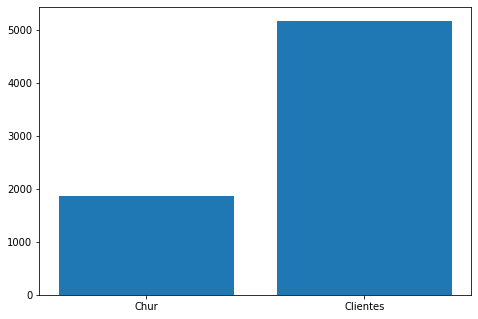

In [159]:
#Neste primeiro gráfico consegui separar a quantidade de Churn para montar o gráfico

df_Chur_N = df['Churn'] == 'No' #Ou seja, é Cliente
df_Chur_Y = df['Churn'] == 'Yes' #Ou seja, é ex-cliente

qtd_Chur_N = len(df[df_Chur_N])
qtd_Chur_Y = len(df[df_Chur_Y])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Chur', 'Clientes']
quantidade = [qtd_Chur_Y,qtd_Chur_N]
ax.bar(labels,quantidade)
plt.show()

In [160]:
df_Homens_Chur_N = len(df[(df.Churn == 'No') & (df.Genero == 'Male')])
df_Homens_Chur_Y = len(df[(df.Churn == 'Yes') & (df.Genero == 'Male')])
df_Mulheres_Chur_N = len(df[(df.Churn == 'No') & (df.Genero == 'Female')])
df_Mulheres_Chur_Y = len(df[(df.Churn == 'Yes') & (df.Genero == 'Female')])


# No gráfico acima não tinha separação de genero
# Para validar se estamos com todos os dados vamos alguns cálculos

Total_Homens = df_Homens_Chur_N + df_Homens_Chur_Y
Total_Mulheres = df_Mulheres_Chur_N + df_Mulheres_Chur_Y
Total_de_registros = Total_Homens + Total_Mulheres

print('Total de registros {}'.format(Total_de_registros))

Total de registros 7043


In [161]:
# Conferindo se o número total de Churn está correto.
# Utilizando os dados separados no box acima

Total_Churn = df_Homens_Chur_Y + df_Mulheres_Chur_Y

print('O total do Churn é: {}'.format(Total_Churn))

O total do Churn é: 1869


In [162]:
# Conferindo se o número total de clientes está correto.
# Utilizando os dados separados no box acima

Total_Clientes = df_Homens_Chur_N + df_Mulheres_Chur_N

print('O total de clientes é: {}'.format(Total_Clientes))

O total de clientes é: 5174


In [163]:
# Verificando se o total de homens está correto

print('O total de homens é: {}'.format(Total_Homens))

O total de homens é: 3555


In [164]:
# Verificando se o total de mulheres está correto

print('O total de mulheres é: {}'.format(Total_Mulheres))

O total de mulheres é: 3488


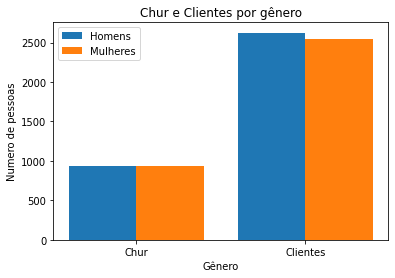

In [170]:
# Utilizando o mesmo código para gerar o gráfico com variáveis com dado preenchidos de forma diferente

import numpy as np 

X = ['Chur','Clientes']
YHomens = [df_Homens_Chur_Y,df_Homens_Chur_N]
YMulheres = [df_Mulheres_Chur_Y,df_Mulheres_Chur_N]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, YHomens, 0.4, label = 'Homens')
plt.bar(X_axis + 0.2, YMulheres, 0.4, label = 'Mulheres')

plt.xticks(X_axis, X)
plt.xlabel("Gênero")
plt.ylabel("Numero de pessoas")
plt.title("Chur e Clientes por gênero")
plt.legend()
plt.show()